In [53]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [54]:
NUM_CLASSES=10
RESHAPED=784 #28*28 PIXEL IMAGES TO A FLATTERN ARREY
HIDDEN_NEURONS=256
IMAGE_ROWS,IMAGE_COLS=28,28
INPUT_SHAPE =(IMAGE_ROWS,IMAGE_COLS,1)

In [55]:
fashion_data=tf.keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_data.load_data()

train_images=train_images.reshape(60000,IMAGE_ROWS,IMAGE_COLS,1)
test_images=test_images.reshape(10000,IMAGE_ROWS,IMAGE_COLS,1)

train_images,test_images=train_images/255.0,test_images/255.0




In [56]:
labels={0:"T-shirt/top",
        1:"Trouser",
        2:"Pullover",
        3:"Dress",
        4:"Coat",
        5:"Sandol",
        6:"Shirt",
        7:"Sneaker",
        8:"Bag",
        9:"Ankle"}


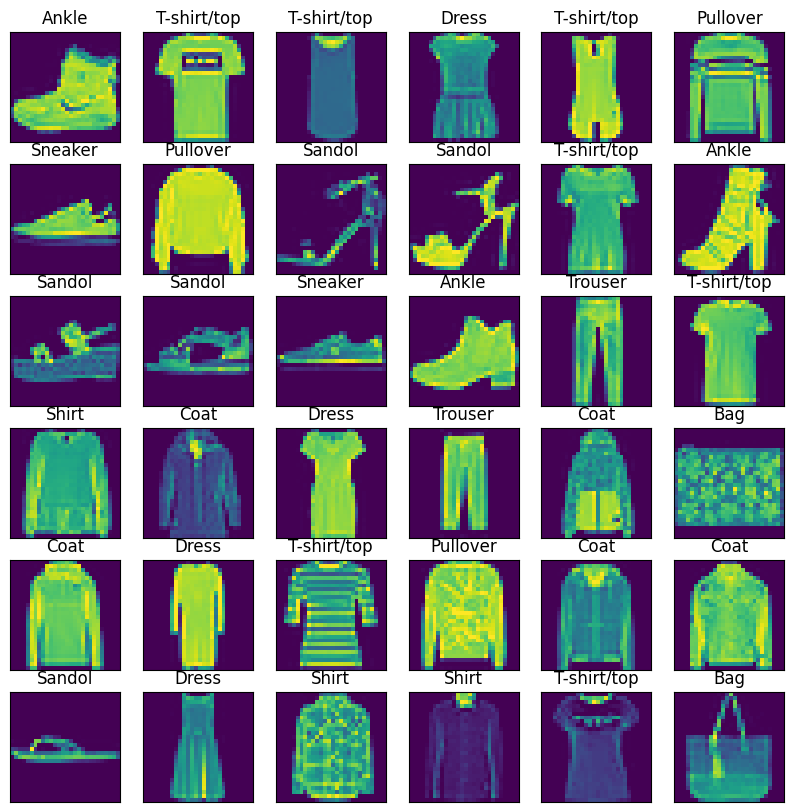

In [57]:
plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMAGE_ROWS, IMAGE_COLS)))
  label_index=train_labels[i]
  plt.title(labels[label_index])

plt.show()

In [58]:
#ONEHOT
train_labels=tf.keras.utils.to_categorical(train_labels,NUM_CLASSES)
test_labels=tf.keras.utils.to_categorical(test_labels,NUM_CLASSES)

In [59]:
class cnn_fmnist:
  @staticmethod
  def build(input_shape,classes):
    model =Sequential([
        Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_shape),
               MaxPooling2D(pool_size=(2,2)),

        Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),
               MaxPooling2D(pool_size=(2,2)),

        Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'),
               MaxPooling2D(pool_size=(2,2)),

        Flatten(),

        Dense(1024,name='dense_layer1',activation='relu'),
        Dense(512,name='dense_layer2',activation='relu'),
        Dense(NUM_CLASSES,name='output_layer',activation='softmax')])
    return model

In [60]:
model=cnn_fmnist.build(input_shape=INPUT_SHAPE,classes=NUM_CLASSES)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer1 (Dense)                 │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer2 (Dense)                 │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,803,274 (6.88 MB)

 Trainable params: 1,803,274 (6.88 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
BATCH_SIZE=128
EPOCHS=50
VALIDATION_SPLIT=0.2



In [62]:
history=model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT,verbose=1)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7236 - loss: 0.7608 - val_accuracy: 0.8690 - val_loss: 0.3516
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8862 - loss: 0.3126 - val_accuracy: 0.8892 - val_loss: 0.3013
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9051 - loss: 0.2583 - val_accuracy: 0.9032 - val_loss: 0.2614
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9180 - loss: 0.2199 - val_accuracy: 0.9062 - val_loss: 0.2625
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9294 - loss: 0.1912 - val_accuracy: 0.9088 - val_loss: 0.2461
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9388 - loss: 0.1664 - val_accuracy: 0.9136 - val_loss: 0.2387
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9438 - loss: 0.1521 - val_accuracy: 0.9201 - val_loss: 0.2276
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9514 - loss: 0.1304 - val_accuracy: 0.

In [63]:
score=model.evaluate(test_images,test_labels)
print('\nTest score; ',score[0])
print('Test Accuracy: ',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9064 - loss: 0.6528

Test score;  0.6371022462844849
Test Accuracy:  0.9088000059127808


Text(0.5, 1.0, 'train-Accuracy')

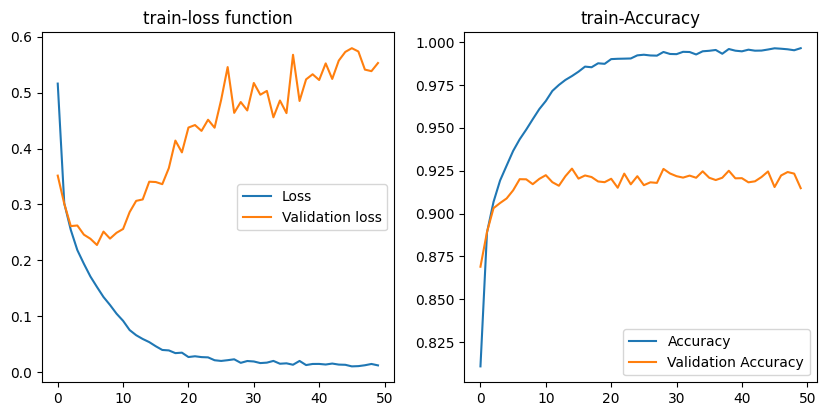

In [64]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()
plt.title('train-loss function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('train-Accuracy')

In [ ]:
predicted_classes=np.around(model.predict(test_images))
predicted_classes=np.argmax(predicted_classes,axis=1)
test_labels=np.argmax(test_labels,axis=1)
correct=np.nonzero(predicted_classes==test_labels)[0]
incorrect=np.nonzero(predicted_classes!=test_labels)[0]

TypeError: unhashable type: 'numpy.ndarray'

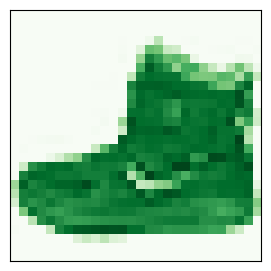

In [65]:
plt.figure(figsize=(15,15))
for i,indx in enumerate(correct[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMAGE_ROWS, IMAGE_COLS)),cmap="Greens")
  label_index=train_labels[indx]
  plt.title("Trur:{} Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))

plt.show()

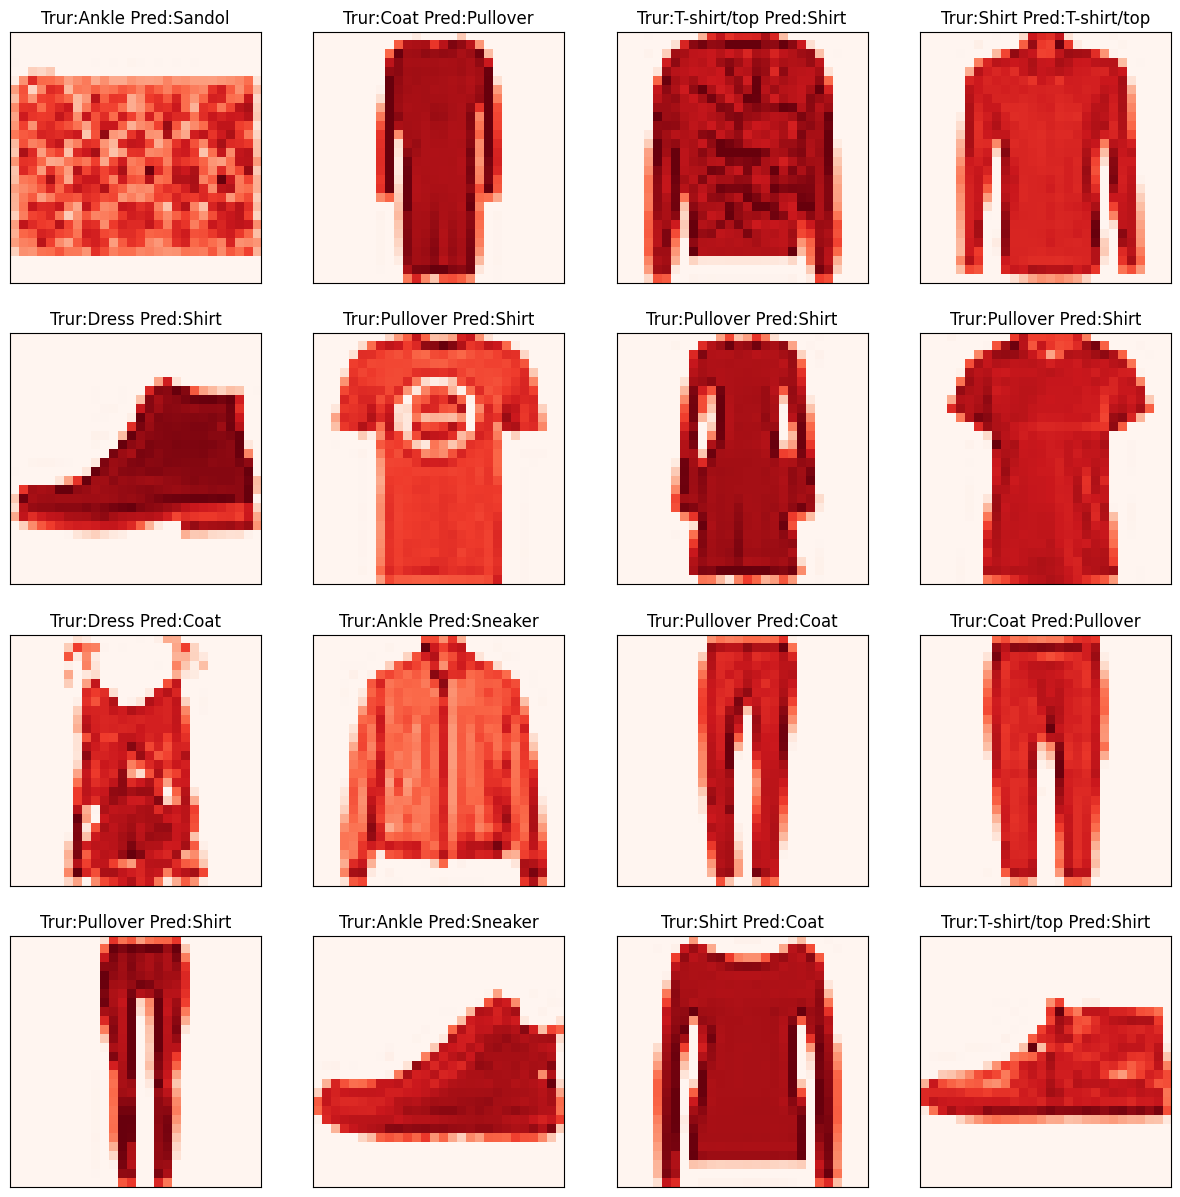

In [16]:
plt.figure(figsize=(15,15))
for i,indx in enumerate(incorrect[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMAGE_ROWS, IMAGE_COLS)),cmap="Reds")
  label_index=train_labels[indx]
  plt.title("Trur:{} Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))

plt.show()

In [33]:
class cnn_fmnist_new:
  @staticmethod
  def build(input_shape,classes,use_l2_reg=False,l2_loss_lambda=0.0025):
    l2=regularizers.l2(l2_loss_lambda) if use_l2_reg else None
    if l2 is not None:
      print('using l2 regularization%.6f'% l2_loss_lambda)

    model =Sequential([
        Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2,input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.15),

        Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),


        Flatten(),
        Dropout(0.4),

        Dense(1024,name='dense_layer1',activation='relu',kernel_regularizer=l2),
        Dropout(0.4),

        Dense(512,name='dense_layer2',activation='relu',kernel_regularizer=l2),
        Dropout(0.2),

        Dense(NUM_CLASSES,name='output_layer',activation='softmax')])
    return model

In [34]:
model=cnn_fmnist_new.build(input_shape=INPUT_SHAPE,classes=NUM_CLASSES,use_l2_reg=True)
adam=Adam(learning_rate=0.0001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

using l2 regularization0.002500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer1 (Dense)                 │ (None, 1024)                │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer2 (Dense)                 │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 845,066 (3.22 MB)

 Trainable params: 844,874 (3.22 MB)

 Non-trainable params: 192 (768.00 B)

In [35]:
BATCH_SIZE=128
EPOCHS=100
VALIDATION_SPLIT=0.2


In [36]:
history=model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT,verbose=1)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3965 - loss: 4.7341 - val_accuracy: 0.3514 - val_loss: 4.4407
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6890 - loss: 3.4961 - val_accuracy: 0.7818 - val_loss: 3.0159
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7339 - loss: 3.0570 - val_accuracy: 0.8064 - val_loss: 2.6386
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7615 - loss: 2.6919 - val_accuracy: 0.8244 - val_loss: 2.3137
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7786 - loss: 2.3677 - val_accuracy: 0.8358 - val_loss: 2.0251
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7927 - loss: 2.0771 - val_accuracy: 0.8407 - val_loss: 1.7776
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8052 - loss: 1.8255 - val_accuracy: 0.8498 - val_loss: 1.5600
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8162 - loss: 1.6040 - val_acc

In [38]:
predicted_classes=np.around(model.predict(test_images))
predicted_classes=np.argmax(predicted_classes,axis=1)
test_labels=np.argmax(test_labels,axis=1)
correct=np.nonzero(predicted_classes==test_labels)[0]
incorrect=np.nonzero(predicted_classes!=test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


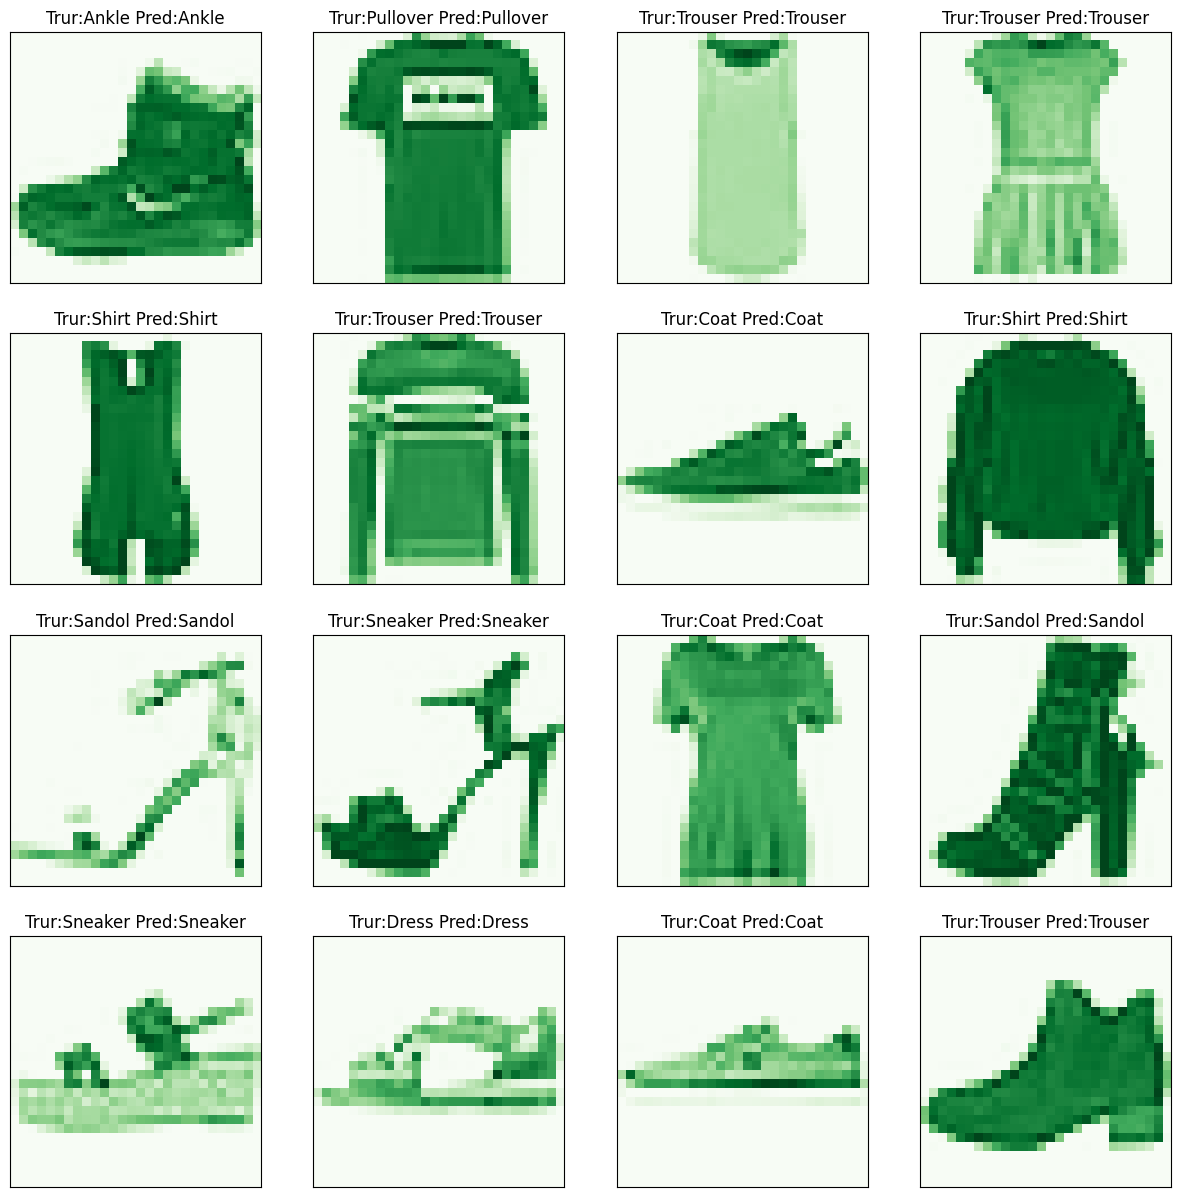

In [39]:
plt.figure(figsize=(15,15))
for i,indx in enumerate(correct[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMAGE_ROWS, IMAGE_COLS)),cmap="Greens")
  label_index=train_labels[indx]
  plt.title("Trur:{} Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))

plt.show()

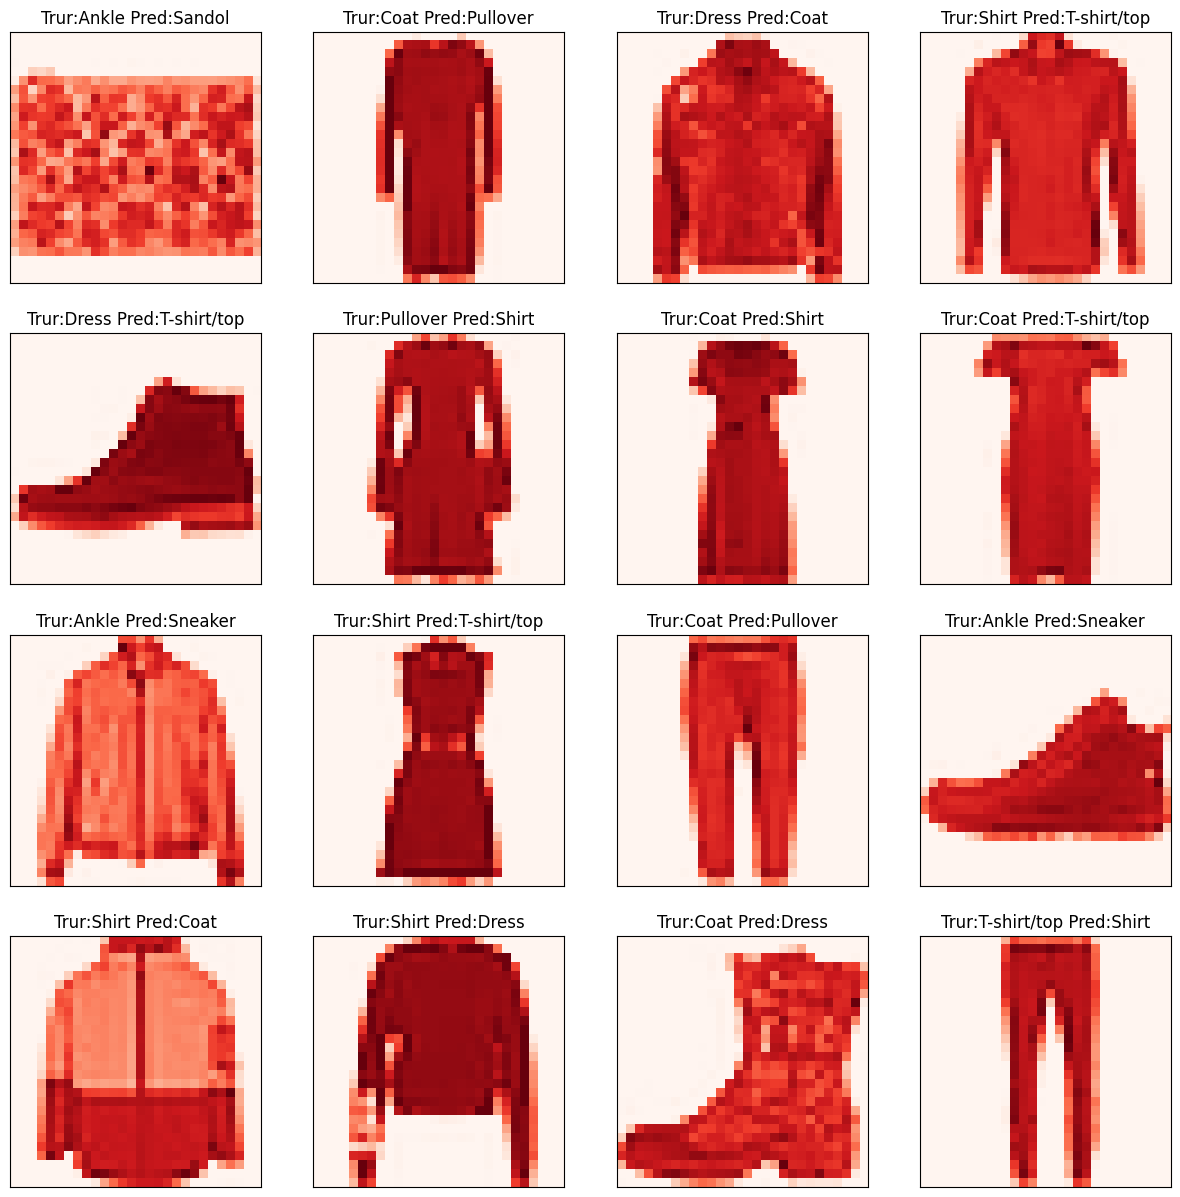

In [40]:
plt.figure(figsize=(15,15))
for i,indx in enumerate(incorrect[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMAGE_ROWS, IMAGE_COLS)),cmap="Reds")
  label_index=train_labels[indx]
  plt.title("Trur:{} Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))

plt.show()

Text(0.5, 1.0, 'train-Accuracy')

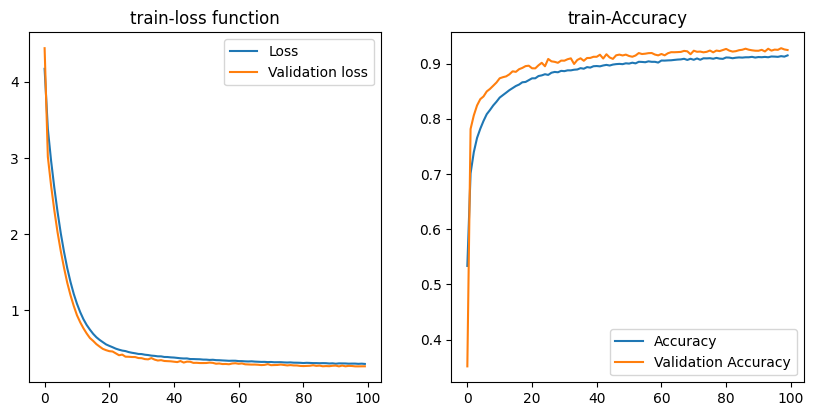

In [41]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()
plt.title('train-loss function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('train-Accuracy')

In [46]:
from keras.utils import to_categorical

test_labels = to_categorical(test_labels, num_classes=10)


In [47]:
score=model.evaluate(test_images,test_labels)
print('\nTest score; ',score[0])
print('Test Accuracy: ',score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9184 - loss: 0.2875

Test score;  0.2831454277038574
Test Accuracy:  0.91839998960495
